# Exercise 6.2

## 01 Importing Libraries

### Visualization Libraries

In [4]:
# Importing Visualization Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

### Analysis Libraries

In [6]:
# Importing Analysis Libraries
import pandas as pd
import numpy as np
import os

## 02 Importing Dataframe

### Creating path

In [9]:
# Path Creation
path = r'/Users/Andreas/Desktop/28-02-2025 Chocolate Ratings Analysis/02 Data/Prepared Data'
path

'/Users/Andreas/Desktop/28-02-2025 Chocolate Ratings Analysis/02 Data/Prepared Data'

### Importing Dataframe using path

In [11]:
df = pd.read_csv(os.path.join(path,'flavours_of_cocoa_clean.csv'))

In [12]:
df

,Unnamed: 0,Manufacturer,Country of Manufacturer,Cocoa (%),Bean Origin (Country),Rating,Review Year,REF
0,0,A. Morin,France,63.0,Sao Tome,3.75,2016,1876
1,1,A. Morin,France,70.0,Togo,2.75,2015,1676
2,2,A. Morin,France,70.0,Togo,3.00,2015,1676
3,3,A. Morin,France,70.0,Togo,3.50,2015,1680
4,4,A. Morin,France,70.0,Peru,3.50,2015,1704
...,...,...,...,...,...,...,...,...
1770,1790,Zotter,Austria,70.0,Peru,3.75,2011,647
1771,1791,Zotter,Austria,65.0,Congo,3.00,2011,749
1772,1792,Zotter,Austria,65.0,India,3.50,2011,749
1773,1793,Zotter,Austria,62.0,India,3.25,2011,781


In [13]:
df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Country of Manufacturer', 'Cocoa (%)',
       'Bean Origin (Country)', 'Rating', 'Review Year', 'REF'],
      dtype='object')

In [14]:
df['REF'] = df['REF'].astype('int64')
df['REF'].dtypes

dtype('int64')

In [15]:
df = df.drop(columns = ['Unnamed: 0'])

In [16]:
df

,Manufacturer,Country of Manufacturer,Cocoa (%),Bean Origin (Country),Rating,Review Year,REF
0,A. Morin,France,63.0,Sao Tome,3.75,2016,1876
1,A. Morin,France,70.0,Togo,2.75,2015,1676
2,A. Morin,France,70.0,Togo,3.00,2015,1676
3,A. Morin,France,70.0,Togo,3.50,2015,1680
4,A. Morin,France,70.0,Peru,3.50,2015,1704
...,...,...,...,...,...,...,...
1770,Zotter,Austria,70.0,Peru,3.75,2011,647
1771,Zotter,Austria,65.0,Congo,3.00,2011,749
1772,Zotter,Austria,65.0,India,3.50,2011,749
1773,Zotter,Austria,62.0,India,3.25,2011,781


## 03 Chosing Variables

### Questions Chosen


**1.** Which countries produce the highest-rated bars?

**2.** What’s the relationship between cocoa solids percentage and rating?

**3.** Whats the relationship between Rating and Review year?

**4.** Is there a correlation between Review Year and Cocoa (%)

### Creating Subset with adequate variables for Analysis

In [21]:
#Creating subset with only necessary numeric variables
sub = df[['Review Year', 'Cocoa (%)', 'REF', 'Rating']]
sub.head()

,Review Year,Cocoa (%),REF,Rating
0,2016,63.0,1876,3.75
1,2015,70.0,1676,2.75
2,2015,70.0,1676,3.00
3,2015,70.0,1680,3.50
4,2015,70.0,1704,3.50


In [22]:
# Creating Subset with all necessary variables
sub2 = df[['Country of Manufacturer', 'Rating', 'Cocoa (%)', 'Bean Origin (Country)']]
sub2.head()

,Country of Manufacturer,Rating,Cocoa (%),Bean Origin (Country)
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru


## 04 Correlation

### Correlation Matrix

In [25]:
# Creating a correlation matrix
sub.corr()

,Review Year,Cocoa (%),REF,Rating
Review Year,1.000000,0.040325,0.985153,0.099797
Cocoa (%),0.040325,1.000000,0.040592,-0.164123
REF,0.985153,0.040592,1.000000,0.101038
Rating,0.099797,-0.164123,0.101038,1.000000


### Correlation Heatmap

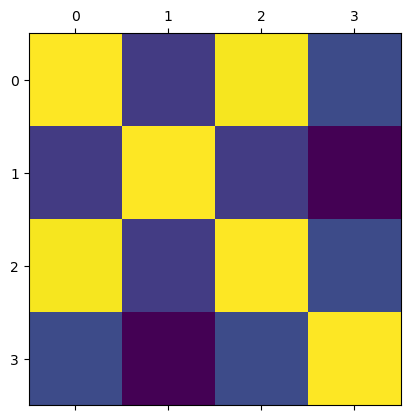

<Figure size 640x480 with 0 Axes>

In [27]:
# Creating a correlation heatmap
plt.matshow(sub.corr())
plt.show()
# Saving figure to directory
plt.savefig("corr.png")

Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 800x800 with 0 Axes>

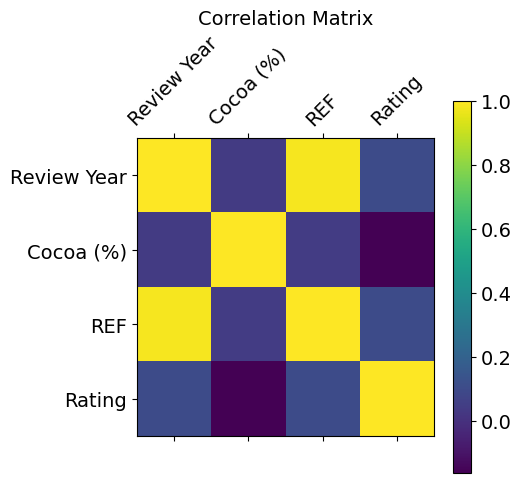

In [28]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr()) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

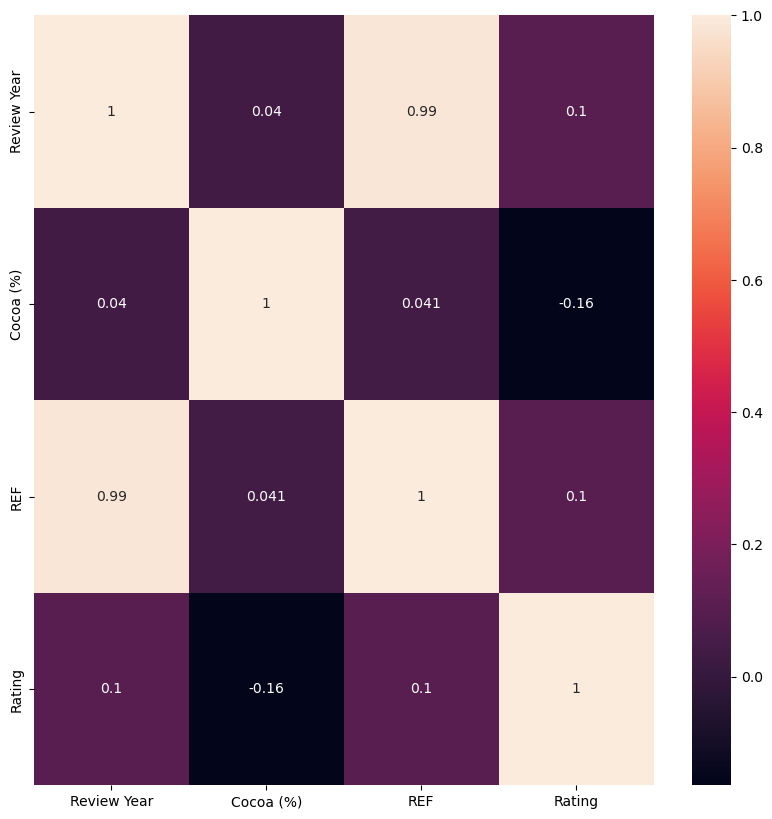

In [29]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

### Correlation Matrix Relationship Explanation

**Strong Positive** - There is a strong correlation between 'REF' and 'Review Year' however this is not helful to the analysis as we know that the larger the number in 'REF' the more recently it was Reviewed thus as 'REF' increases so does 'Review Year'

**Weak Positive** - 'Review Year' and 'Rating' , 'Review Year' and 'Cocoa (%)', 'REF' and 'Rating', 'REF' and 'Cocoa (%)'
have a range of correlation ranging from 0.04 to 0.1, a correlation of 0 means there is no correlation and 1 a shows a strong relationship. Thus, even though there is a positive correlation it is almost non existant it may be caused by outliers within the data that could be skewing it

**Weak Negative** - 'Cocoa (%)' and 'Rating' have a Weak Negative correlation as 'Cocoa (%)' Increases 'Rating' Decreases and vica versa. However, the relationship is so weak that it doesn't help my analysis and no important trend has been found.

## Scatter Plot

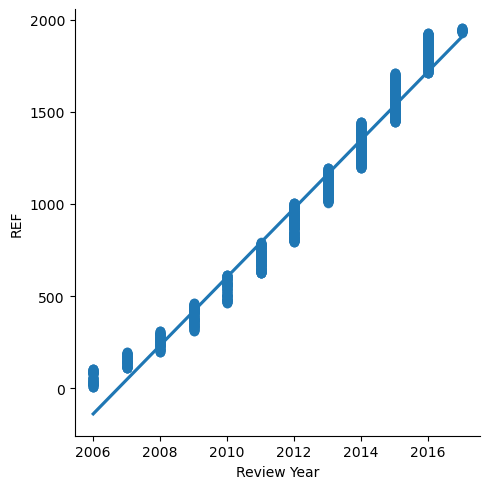

In [32]:
# Create a scatterplot for the "Review Year" and "REF" columns in seaborn
sns.lmplot(x = 'Review Year', y = 'REF', data = sub)

### Observations

Their is a very strong Correlation between Review Year and REF as one Increases so does the other the points are very close to the line showing that they do directly affect each other.

## 05 Pair Plot of whole Data Set

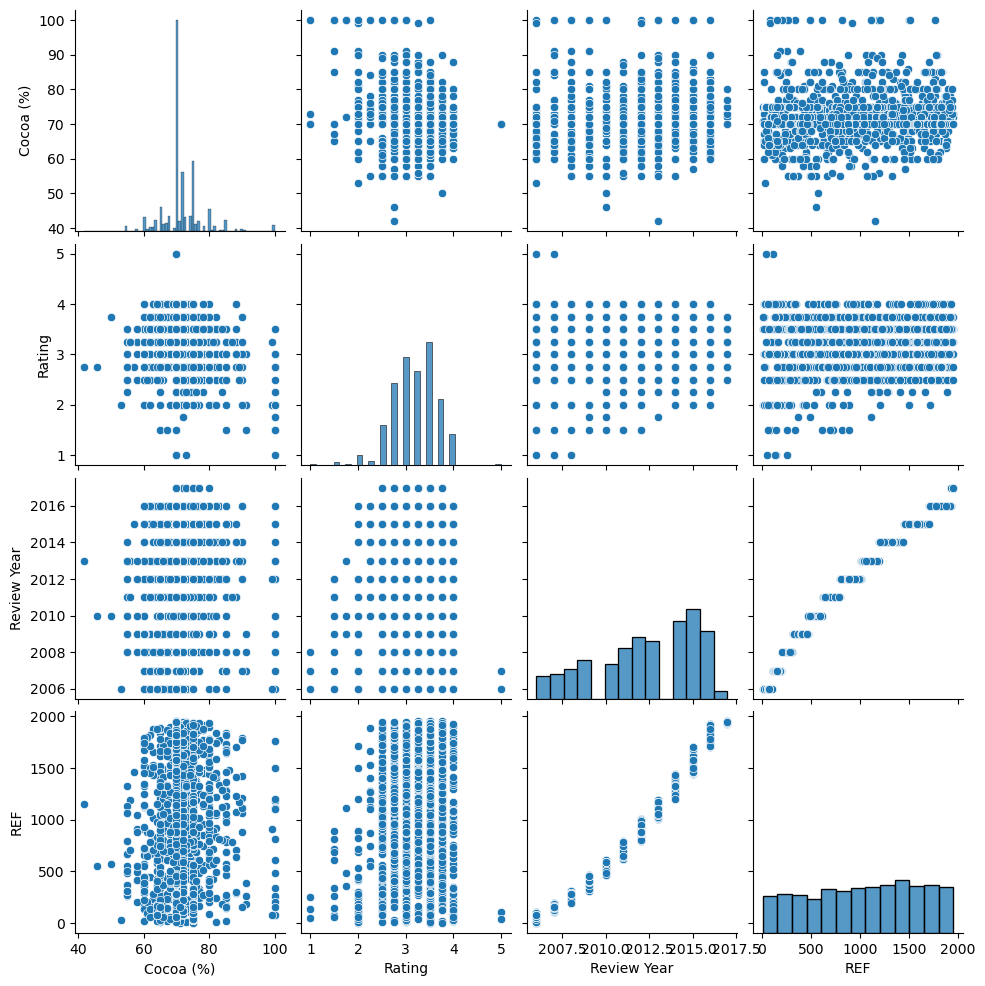

In [35]:
# Create a pair plot 
pair_plot = sns.pairplot(df)

### Observations

**'Cocoa (%)' and 'REF'** No trends seen, One thing that can be deducted that most of the entries are between 60 and 80 Cocoa %

**'Rating' and 'Review Year'** After the year 2013 with the exception of 1 there are no ratings below 2 (This would be intresting to investigate, especially when combined with other categorical variables).

**'Review Year' and 'REF'** Also seen in the scatterplot earlier in this exercise the points are all quite close for each year trending in an upward trend. There is a strong correlation and these 2 numerical variables.

There are not many trends and patterns within the data that give us a valuable insight or answer any of the questions asked.

## 06 Categorical Plot

In [38]:
# Creating Categories from Rating Column
df.loc[df['Rating'] <= 2, 'Rating Category'] = 'Low Rating'
df.loc[(df['Rating'] > 2) & (df['Rating'] <= 4), 'Rating Category'] = 'Medium Rating'
df.loc[df['Rating'] >4, 'Rating Category'] = 'High Rating'

# Checking output
df['Rating Category'].value_counts(dropna = False)

Rating Category
Medium Rating    1724
Low Rating         49
High Rating         2
Name: count, dtype: int64

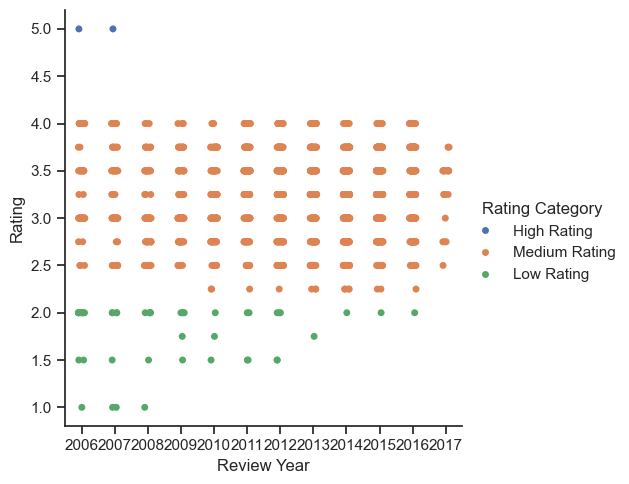

In [39]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
Cat_plot = sns.catplot(x="Review Year", y="Rating", hue="Rating Category", data=df)

### Observations

The the only years with a high rating are 2006 and 2007. It is intresting to see that as the year increases so does the number of low ratings. In 2016 to 2017 there is a drop at the top end of the rating however their is an increase in the lowest rating.

## 07 Deriving a Hypothesis

At this point its hard to deduce, this data set doesnt have an abundance of numerical values to analyze thus an analysis with categorical variables might shed more light on this analysis. As it stands the Hyothesis I have chosen is, 'As year increases the recepies of the chocolates evolve thus resulting in higher ratings'

In [42]:
# Export Visualizations to Visulaizations Folder

#Creating path
path2 = r'/Users/Andreas/Desktop/28-02-2025 Chocolate Ratings Analysis/04 Analysis/Visualizations'

